# Movie Search Blog
## Part 1: Populate and Explore Neptune

In this section we load movie data into a Amazon Neptune database. The following figure describes our graph data model. Nodes are represented by circles, while edges are represented by arrows connecting circles. 

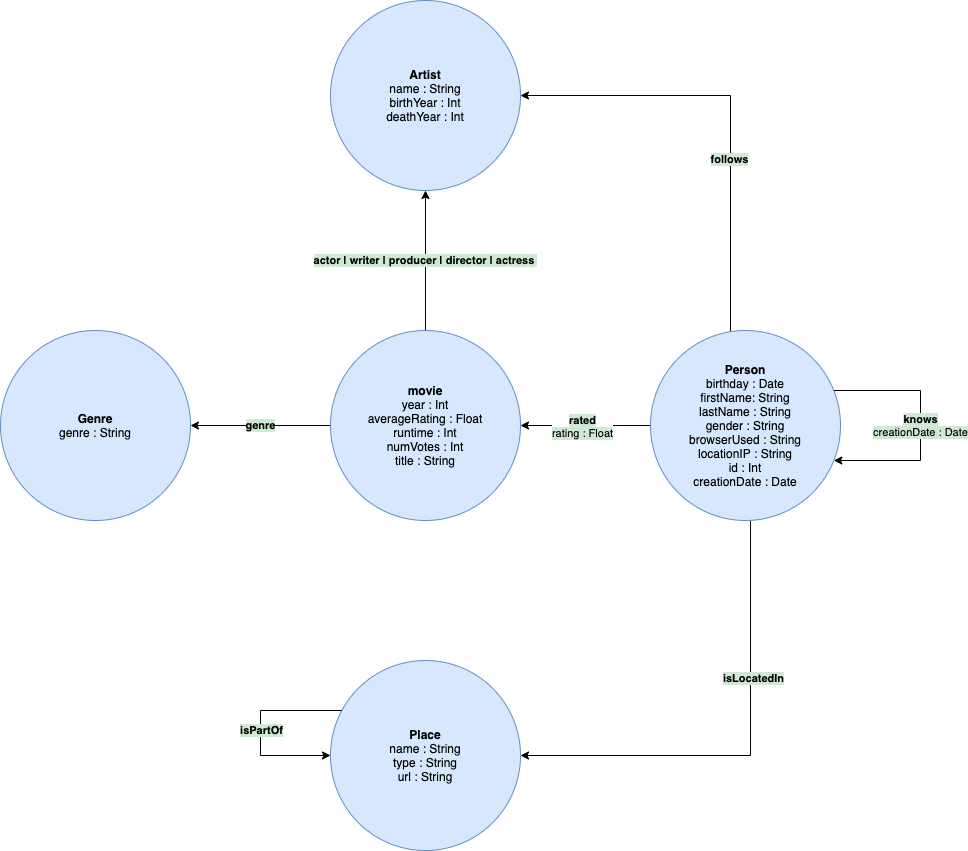



## Bulk-load movie, artist, and genre data to Neptune

The first step in orchestrating multi-dimensional content search is populating our Amazon Neptune database with the sample movie data.

In [ ]:
# Replace with your S3 bucket where you prepared the IMDB data for Neptune use
SOURCE_S3_PATH_NOSLASH=f"s3://<your bucket>"

s3datapath = f"{SOURCE_S3_PATH_NOSLASH}/source"

# Using the Neptune Workbench's %load magic to instantiate a bulk load from the social graph in S3
%load -s {s3datapath} -f csv -p OVERSUBSCRIBE --store-to result1 --no-fail-on-error --run

In [ ]:
# Return the load status to verify a successful data upload. Expect missing vertex errors in m2a; we included feature films only
%load_status {result1['payload']['loadId']} --details --errors

The summary cell bellow will tell us if our data has been successfully loaded into the graph, the output will tell us the number of nodes for each category of item in the graph.

In [ ]:
# Return the profile of data inside the graph
%summary --detailed propertygraph

## Run a few exploratory queries

Lets now explore a few queries to familiarize ourselves with the data in our graph. First we will start out with a simple query to look at a few movies.

In [ ]:
%%oc

MATCH(m:movie)
RETURN m
LIMIT 10

Now lets do the same thing but instead focus on artists in the graph.

In [ ]:
%%oc

MATCH(a:Artist)
RETURN a
LIMIT 10

Next, lets look at some relationships, run the cell below to explore the connections between movies and the artists associated with those movies.

In [ ]:
%%oc

MATCH path=(m:movie)-[:actor|actress|director]->(a:Artist)
RETURN path
LIMIT 100

Lets look at a specifc example, the query below focuses the movie Goodfellas, and explores the associated artists with the movie.

In [ ]:
%%oc

MATCH path=(m:movie {title:'Goodfellas'})-[:actor|actress|director]->(a:Artist)
RETURN path
LIMIT 100

In [ ]:
%%oc

MATCH path=(m:movie {title:'Goodfellas'})-[:actor|actress|director]->(a:Artist)<-[:actor|actress|director]-(movie)
RETURN path
LIMIT 300

Finally, lets explore the inverse relationship. We will now focus on the actor Tom Hanks, and explore all of the movies he is associated with.

In [ ]:
%%oc

MATCH path=(m:movie)-[:actor|actress|director]->(a:Artist {name: 'Tom Hanks'})
RETURN path
LIMIT 100